In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# teenon files read karo
df1 = pd.read_csv("api_data_aadhar_enrolment_0_500000.csv")
df2 = pd.read_csv("api_data_aadhar_enrolment_500000_1000000.csv")
df3 = pd.read_csv("api_data_aadhar_enrolment_1000000_1006029.csv")

# concatenation
df = pd.concat([df1, df2,df3], ignore_index=True)
print(df)

               date          state          district  pincode  age_0_5  \
0        02-03-2025      Meghalaya  East Khasi Hills   793121       11   
1        09-03-2025      Karnataka   Bengaluru Urban   560043       14   
2        09-03-2025  Uttar Pradesh      Kanpur Nagar   208001       29   
3        09-03-2025  Uttar Pradesh           Aligarh   202133       62   
4        09-03-2025      Karnataka   Bengaluru Urban   560016       14   
...             ...            ...               ...      ...      ...   
1006024  31-12-2025    West Bengal    West Midnapore   721149        2   
1006025  31-12-2025    West Bengal    West Midnapore   721150        2   
1006026  31-12-2025    West Bengal    West Midnapore   721305        0   
1006027  31-12-2025    West Bengal    West Midnapore   721504        1   
1006028  31-12-2025    West Bengal    West Midnapore   721517        2   

         age_5_17  age_18_greater  
0              61              37  
1              33              39  
2  

In [22]:
df.shape

(1006029, 7)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   date            1006029 non-null  object
 1   state           1006029 non-null  object
 2   district        1006029 non-null  object
 3   pincode         1006029 non-null  int64 
 4   age_0_5         1006029 non-null  int64 
 5   age_5_17        1006029 non-null  int64 
 6   age_18_greater  1006029 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 53.7+ MB


In [4]:
df.head()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,02-03-2025,Meghalaya,East Khasi Hills,793121,11,61,37
1,09-03-2025,Karnataka,Bengaluru Urban,560043,14,33,39
2,09-03-2025,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,09-03-2025,Uttar Pradesh,Aligarh,202133,62,29,15
4,09-03-2025,Karnataka,Bengaluru Urban,560016,14,16,21


In [5]:
df['state'].value_counts() ## 

state
Uttar Pradesh                                   110369
Tamil Nadu                                       92552
Maharashtra                                      77191
West Bengal                                      76519
Karnataka                                        70198
Andhra Pradesh                                   65658
Bihar                                            60567
Rajasthan                                        56159
Madhya Pradesh                                   50225
Gujarat                                          46624
Odisha                                           43691
Telangana                                        42774
Kerala                                           39145
Assam                                            31827
Jharkhand                                        23218
Punjab                                           20439
Chhattisgarh                                     18550
Haryana                                          15997
Jamm

In [6]:
df.tail()

,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
1006024,31-12-2025,West Bengal,West Midnapore,721149,2,0,0
1006025,31-12-2025,West Bengal,West Midnapore,721150,2,2,0
1006026,31-12-2025,West Bengal,West Midnapore,721305,0,1,0
1006027,31-12-2025,West Bengal,West Midnapore,721504,1,0,0
1006028,31-12-2025,West Bengal,West Midnapore,721517,2,1,0


In [7]:
df.dtypes

date              object
state             object
district          object
pincode            int64
age_0_5            int64
age_5_17           int64
age_18_greater     int64
dtype: object

In [8]:
# Date column convert to datetime format
# isse ho sakta hai kuch invalid date formats ho jayein
# df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%y', errors='coerce')

In [9]:
df.duplicated().sum()

np.int64(618696)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(387333, 7)

In [12]:
## koi value negative to nahi hai na age columns mein
(df[['age_0_5','age_5_17','age_18_greater']] < 0).sum()

age_0_5           0
age_5_17          0
age_18_greater    0
dtype: int64

In [13]:
df['total_population'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)

In [14]:
# Univariate Analysis distributions
df[['age_0_5','age_5_17','age_18_greater','total_population']].describe()

,age_0_5,age_5_17,age_18_greater,total_population
count,387333.000000,387333.000000,387333.000000,387333.000000
mean,6.308195,3.654377,0.420739,10.383311
std,27.933985,22.980880,5.175760,50.404423
min,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,2.000000
50%,3.000000,1.000000,0.000000,5.000000
75%,6.000000,3.000000,0.000000,9.000000
max,2688.000000,1812.000000,855.000000,3965.000000


<Axes: >

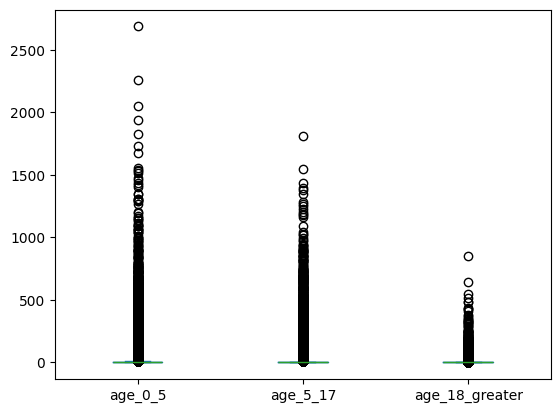

In [15]:
# Bivariate Analysis Realtions
df[['age_0_5','age_5_17','age_18_greater']].plot(kind='box')

In [16]:
# Bivariate Analysis Realtions
# State vs Total Population
df.groupby('state')['total_population'].sum().sort_values(ascending=False)

state
Uttar Pradesh                                   856116
Bihar                                           516287
Madhya Pradesh                                  407691
West Bengal                                     266587
Rajasthan                                       266157
Maharashtra                                     258860
Gujarat                                         218753
Assam                                           189780
Karnataka                                       130587
Jharkhand                                       123586
Meghalaya                                       106682
Tamil Nadu                                       96873
Delhi                                            82668
Telangana                                        71602
Chhattisgarh                                     70464
Haryana                                          64811
Odisha                                           59238
Punjab                                           49429
Andh

<Axes: >

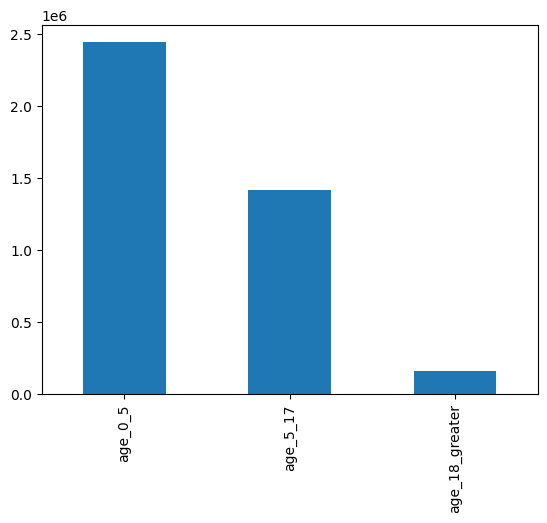

In [17]:
# Age Group Comparison
df_age_group = df[['age_0_5','age_5_17','age_18_greater']].sum()
df_age_group.plot(kind='bar')

In [18]:
# Time Trend Analysis
df_time_trend = df.groupby(['year', 'month'])['total_population'].sum().reset_index()
df_time_trend['date'] = pd.to_datetime(df_time_trend[['year', 'month']].assign(DAY=1))
plt.plot(df_time_trend['date'], df_time_trend['total_population'])
plt.xlabel('Date')
plt.ylabel('Total Population')
plt.title('Time Trend of Total Population')
plt.show()  

KeyError: 'year'

# Handling missing values

In [ ]:
# df[df.isnull()]
# df.isnull().any()
df.isnull().sum()

date                387333
state                    0
district                 0
pincode                  0
age_0_5                  0
age_5_17                 0
age_18_greater           0
year                387333
month               387333
total_population         0
dtype: int64